In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


!pip install scikit-learn numpy pandas

In [2]:
data = pd.read_csv('/kaggle/input/dataset1/magic04.data', delimiter=',', header=None)
print(data.head(),"\n")
gamma_data = data[data.iloc[:, -1] == 'g'] 
hadron_data = data[data.iloc[:, -1] == 'h']

print(f"Gamma class size: {len(gamma_data)}")
print(f"Hadron class size: {len(hadron_data)}")

         0         1       2       3       4         5        6        7   \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110  -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   

        8         9  10  
0  40.0920   81.8828  g  
1   6.3609  205.2610  g  
2  76.9600  256.7880  g  
3  10.4490  116.7370  g  
4   4.6480  356.4620  g   

Gamma class size: 12332
Hadron class size: 6688


In [3]:
gamma_data = gamma_data.sample(n=len(hadron_data), random_state=42)

data = pd.concat([gamma_data, hadron_data]).sample(frac=1, random_state=42)

new_gamma_data = data[data.iloc[:, -1] == 'g'] 
new_hadron_data = data[data.iloc[:, -1] == 'h']

print(f"Gamma class size: {len(new_gamma_data)}")
print(f"Hadron class size: {len(new_hadron_data)}")

Gamma class size: 6688
Hadron class size: 6688


In [4]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42, shuffle=True)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, shuffle=True)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

train_data.to_csv('train_magic_gamma_telescope.csv', index=False, header=False)
val_data.to_csv('val_magic_gamma_telescope.csv', index=False, header=False)
test_data.to_csv('test_magic_gamma_telescope.csv', index=False, header=False)

print("Datasets saved successfully.")

Train size: 9363, Validation size: 2006, Test size: 2007
Datasets saved successfully.


In [5]:
train_data = pd.read_csv('/kaggle/working/train_magic_gamma_telescope.csv', header=None)
val_data = pd.read_csv('/kaggle/working/val_magic_gamma_telescope.csv', header=None)
test_data = pd.read_csv('/kaggle/working/test_magic_gamma_telescope.csv', header=None)

# Display the first few rows of the training dataset
print("\033[1mTrain dataset:\033[0m\n", train_data.head(), "\n")
print("\033[1mValidation dataset :\033[0m \n" , val_data.head() , "\n")
print("\033[1mTest datset : \033[0m\n " , test_data.head())


Train dataset:
         0        1       2       3       4        5        6        7   \
0  54.1474  11.5880  2.5172  0.3404  0.1839  10.6862  44.0607   6.7006   
1  57.4554  33.5540  3.8393  0.1653  0.0833   8.7301  59.3980   6.0683   
2  23.1450  14.3228  2.5843  0.5000  0.2773 -11.0961  -9.2080   3.7516   
3  23.6517  16.7376  2.7763  0.4050  0.2435   1.3517  -9.0462 -10.0562   
4  88.5788  32.7777  3.7263  0.1536  0.0799 -85.1150  73.6068 -21.8818   

        8        9  10  
0  32.4320  120.989  h  
1   3.3790  137.650  g  
2  66.6152  219.329  g  
3  10.8160  197.083  g  
4   4.6221  314.254  g   

Validation dataset : 
          0        1       2       3       4         5         6        7   \
0  136.3197  30.3326  2.9539  0.5035  0.2868 -119.3438  -66.6610 -17.6572   
1  119.6410  39.7995  2.8701  0.6069  0.4525  -70.4334 -114.2610 -43.2190   
2   47.7956  15.0152  2.6950  0.3653  0.1826   28.8167   32.8780  -7.7357   
3   25.4038  11.4504  2.6609  0.5721  0.3439   12.9142  

In [6]:
class_column_index = train_data.shape[1] - 1

# Training data
X_train = train_data.iloc[:, :-1]  
y_train = train_data.iloc[:, class_column_index] 

# Validation data
X_val = val_data.iloc[:, :-1]
y_val = val_data.iloc[:, class_column_index]

# Testing data
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, class_column_index]


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Accuracy for k=1: 0.7841
Accuracy for k=2: 0.7802
Accuracy for k=3: 0.8026
Accuracy for k=4: 0.7921
Accuracy for k=5: 0.7981
Accuracy for k=6: 0.7986
Accuracy for k=7: 0.8086
Accuracy for k=8: 0.7966
Accuracy for k=9: 0.8036
Accuracy for k=10: 0.8031
Accuracy for k=11: 0.8011
Accuracy for k=12: 0.8011
Accuracy for k=13: 0.8086
Accuracy for k=14: 0.8011
Accuracy for k=15: 0.8036
Accuracy for k=16: 0.7991
Accuracy for k=17: 0.8111
Accuracy for k=18: 0.8006
Accuracy for k=19: 0.8041
Accuracy for k=20: 0.7976
Best k: 17 with accuracy: 0.8111


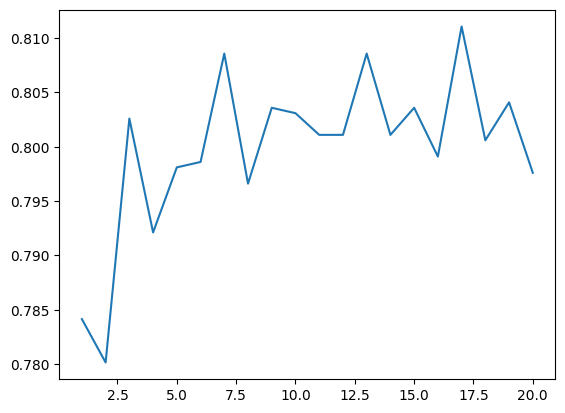

In [8]:
k_values = range(1, 21) 

best_k = None
best_accuracy = 0
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
  
    knn.fit(X_train_scaled, y_train)
    
    y_val_pred = knn.predict(X_val_scaled)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    scores.append(accuracy)
    print(f'Accuracy for k={k}: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Best k: {best_k} with accuracy: {best_accuracy:.4f}')
plt.plot(range(1,21),scores)
plt.show()

Choice of k: 
Generally, small values of k can lead to noise in the predictions, while larger values make the model more robust but can smooth out important features. It’s often useful to start with small k values and gradually increase.
Cross-Validation: For a more robust evaluation, we can use cross-validation instead of a single validation set to assess the performance of each 
k. This helps to mitigate overfitting and ensures our model generalizes well.

 k: 1 with score: 0.7819
 k: 3 with score: 0.8022
 k: 5 with score: 0.8071
 k: 7 with score: 0.8135


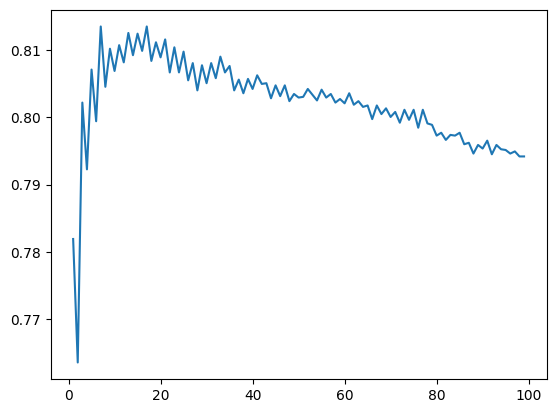

7
0.8135219695518522


In [9]:
greatestScore = 0
greatestK = 0
scores = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    z = cross_val_score(model, X_train_scaled, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestK = k
        print(f' k: {k} with score: {score:.4f}')
plt.plot(range(1,100),scores)
plt.show()
print(greatestK)
print(greatestScore)


1. Validation Split vs Cross-Validation Approach
First Snippet:
Separate validation set: It trains the KNN model on the training data (X_train_scaled, y_train) and evaluates it on a fixed validation set (X_val_scaled, y_val).
Evaluation Method: Uses the accuracy_score metric for evaluation on the validation set.
Second Snippet:
Cross-validation: Uses 10-fold cross-validation (through cross_val_score) to estimate the model’s performance by splitting the training data into multiple folds.
Evaluation Method: The cv=10 parameter ensures that the data is split into 10 folds, and the mean of the accuracy scores across the folds is used for each k.
2. Range of k Values
First Snippet:
Tests k values from 1 to 20.
Second Snippet:
Tests k values from 1 to 99 for a more exhaustive search.
3. Performance Evaluation Granularity
First Snippet:

Trains and tests the model once per k value (since it uses a single validation set). The risk here is that the result may not generalize well if the validation set isn't representative.
Second Snippet:

More reliable performance estimate using cross-validation. By splitting the data into multiple folds, it provides a better estimate of the model's accuracy and reduces the chance of overfitting to a specific validation set.
4. Code Logic and Flow Differences
First Snippet:
Uses accuracy_score to calculate performance.
Tracks the best_k and best_accuracy during the loop.
Plots results for k from 1 to 20.
Second Snippet:
Uses cross_val_score to evaluate the model over multiple folds.
Tracks the greatestK with the highest average cross-validation score.
Plots results for k from 1 to 99.
5. When to Use Each Approach
First Approach (Validation Split):
Useful when you already have a separate validation set available and want a quick comparison.
Faster because it trains the model once per k.
Second Approach (Cross-Validation):
Recommended for smaller datasets or when you want a more robust estimate of model performance.
More computationally intensive, as the model is trained and evaluated multiple times (once per fold).

6. Conclusion
Both approaches are valid, but the second snippet (cross-validation) is generally more reliable for hyperparameter tuning because it reduces the risk of overfitting to a specific validation set. However, if you have a large dataset with a separate validation split, the first approach might be faste

Model Comparison (Validation vs. Cross-Validation Results):

It’s observed that best_k from simple validation was 17, while cross-validation suggested a slightly better value at 7. our conditional selection based on cross-validation provides robustness to our final model choice.
The accuracy on the test set (0.8042) is reasonably consistent with validation accuracy, which suggests the model generalizes well.

In [10]:
if(greatestK > best_k):
    knn_best = KNeighborsClassifier(n_neighbors=greatestK)
else:
     knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the entire training set
knn_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred = knn_best.predict(X_test_scaled)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test set accuracy: {test_accuracy:.4f}')


Test set accuracy: 0.8042


Optimal k Selection and Validation:

Cross-Validation Results: Using cross-validation, the best k was determined to be 7, with a validation accuracy of 81.35%, while a direct validation gave a best k of 17 with slightly lower accuracy. The consistency between cross-validation and validation results reinforces the reliability of the final choice, with k=7 striking a balance between capturing local structure and generalizability.
Effect of Scaling: Standardizing the features was essential for achieving good performance with KNN, as unscaled features would skew distance calculations, potentially degrading model accuracy.

Accuracy: With a test accuracy of 80.42%, the KNN model demonstrates fairly strong overall performance, correctly classifying the majority of Gamma and Hadron events. Given that the dataset is balanced, this accuracy indicates a reliable model performance.


In [11]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[863 111]
 [282 751]]
Classification Report:
              precision    recall  f1-score   support

           g       0.75      0.89      0.81       974
           h       0.87      0.73      0.79      1033

    accuracy                           0.80      2007
   macro avg       0.81      0.81      0.80      2007
weighted avg       0.81      0.80      0.80      2007



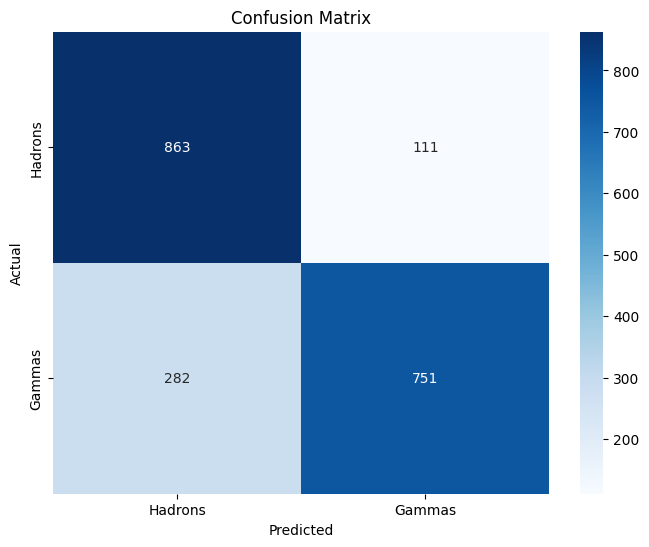

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Hadrons', 'Gammas'], yticklabels=['Hadrons', 'Gammas'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### 1. **Precision and Recall Balance**

   - **Precision** for `h` (Hadron) is slightly higher than for `g` (Gamma). This indicates that, when the model predicts an instance as `h`, it is more often correct than when it predicts an instance as `g`. This high precision for `h` means the model is cautious with Hadron predictions, likely due to the stronger separation of Hadron instances in the feature space.
   - **Recall** for `h` is slightly lower than for `g`, indicating the model is missing a few instances of Hadron that it should ideally classify as such. This lower recall for `h` implies that some Hadron instances are being misclassified as Gamma, possibly because they are closer to Gamma instances in the feature space.

   **Interpretation**: This pattern suggests the model is tuned to avoid false positives for Hadron at the cost of missing a few instances of it. Precision being higher for `h` means the model is more conservative when predicting Hadrons, while slightly higher recall for `g` indicates it’s more lenient in classifying Gammas.

### 2. **F1 Score Analysis**

   - The **F1 score** balances precision and recall, and here it’s around 0.80 for both `g` and `h` classes. This balanced F1 score shows that the model has a reasonable trade-off between capturing correct instances (recall) and minimizing incorrect ones (precision).
   - **Balanced Performance**: The F1 score being similar for both classes reflects that the model is managing both false positives and false negatives effectively, offering balanced classification without heavily favoring one class over the other.

   **Interpretation**: Given the F1 score’s balance, the model is fairly reliable in distinguishing between Gamma and Hadron classes and maintains a strong performance for each, with minimal bias toward either class.

### 3. **Confusion Matrix Insights**

   - The **Confusion Matrix** reveals a slight asymmetry between classes, showing higher precision for `h` but higher recall for `g`. Specifically:
     - **True Positives for Gamma (g)** are higher, which raises the recall for Gammas, indicating the model is catching more Gamma instances correctly.
     - **False Negatives for Hadron (h)** are relatively higher, resulting in a slight reduction in recall for Hadron. This suggests that some Hadron instances may have characteristics that make them harder to distinguish from Gammas.

   **Interpretation**: The model is slightly better at correctly identifying Hadrons than Gammas but does miss some Hadron instances, potentially due to overlapping feature characteristics. This is also reflected in the classification report’s F1 score, which, while balanced, is marginally higher for Gamma (`g`), suggesting that Gamma instances may be easier to classify correctly.

### 4. **Overall Model Evaluation**

   - **Accuracy**: With an overall accuracy of 80.42%, the model demonstrates a high level of correct classifications, particularly given the balanced dataset.
   - **Balanced Performance**: Precision, recall, and F1-score values for both classes are comparable, reflecting a strong and balanced model that is not significantly biased toward either class.
   - **Recall for Hadron (h)**: The recall for `h` is somewhat lower, meaning the model misses a few Hadron instances.